Реализовать простейший телеграм эхо-бот - бот, который будет отвечать на сообщения пользователя его же словами. Приложить скриншоты работа бота в отчете.

In [ ]:
!pip install pytelegrambotapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.9/222.9 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytelegrambotapi: filename=pyTelegramBotAPI-4.10.0-py3-none-any.whl size=205421 sha256=0106ae3f1a53037ed8081e9b1c09f9f9e90c47b6a96da4be50d004b68941efe1
  Stored in directory: /root/.cache/pip/wheels/ef/ba/4b/187be68f61aa7818b28d8b21200d130fd35ba36f002efcc262
Successfully built pytelegrambotapi


In [ ]:
import telebot # импортируем библиотеку

#token = 'ваш токен'
token = '6224308434:AAH18SHIsyQcMoQ3DZ0uAY2huCDrpATQxm8' # Помещаем токен, который получили ранее, в переменную token

bot = telebot.TeleBot(token)

@bot.message_handler(content_types=["text"])
def echo(message):
    bot.send_message(message.chat.id, message.text)

bot.polling(none_stop=True)

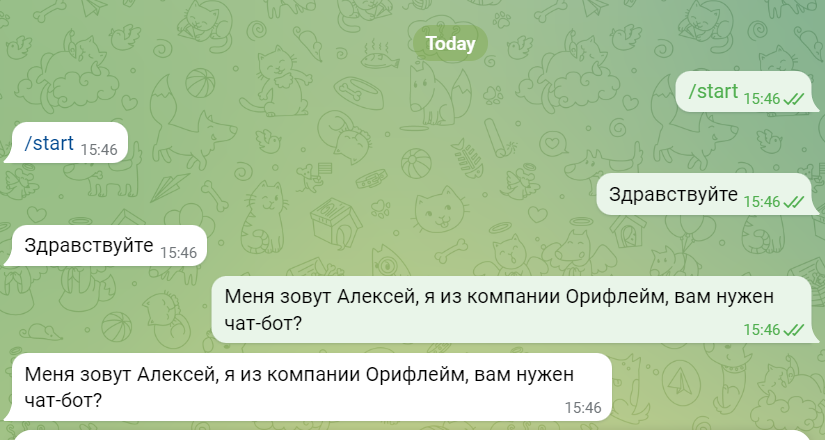

Реализовать бот, который из двух заранее заданных списков выбирает случайный текст в зависимости от выбора пользователя (по аналогии с ботом, который выводит факт или поговорку). Наборы данных, в которых будут храниться данные создать самостоятельно (можно также использовать факты и поговорки, но свои). Привести в отчете примеры работы бота, а также приложить файлы, которые использовались в боте.

In [ ]:
import telebot
import random
from telebot import types

import requests
import re

response = requests.get('https://raw.githubusercontent.com/vibozhenko/dpo_labs/main/facts.txt')
facts = response.text
facts = re.sub('\r','',facts)
facts = facts.split('\n')

response = requests.get('https://raw.githubusercontent.com/vibozhenko/dpo_labs/main/thinks.txt')
thinks = response.text
thinks = re.sub('\r','',thinks)
thinks = thinks.split('\n')

bot = telebot.TeleBot('6224308434:AAH18SHIsyQcMoQ3DZ0uAY2huCDrpATQxm8')

@bot.message_handler(commands=['help'])
def send_welcome(message):
  bot.send_message(message.chat.id, 'Нажмите start для начала работы и появления меню.')


@bot.message_handler(commands=["start"])
def start(m, res=False):
        markup = types.ReplyKeyboardMarkup(resize_keyboard=True) # клавиатура
        item1 = types.KeyboardButton("Факт")  # кнопка Факт
        item2 =types.KeyboardButton("Поговорка")
        markup.add(item1)
        markup.add(item2)
        bot.send_message(m.chat.id, 'Нажми: \nФакт для получения интересного факта\nПоговорка — для получения мудрой цитаты ',  reply_markup=markup)

@bot.message_handler(content_types=["text"])
def handle_text(message):
    if message.text.strip() == 'Факт' :
            answer = random.choice(facts)
    elif message.text.strip() == 'Поговорка':
            answer = random.choice(thinks)
    else:
      answer = 'Выберите Факт или поговорку'
    bot.send_message(message.chat.id, answer)

bot.polling(none_stop=True, interval=0)

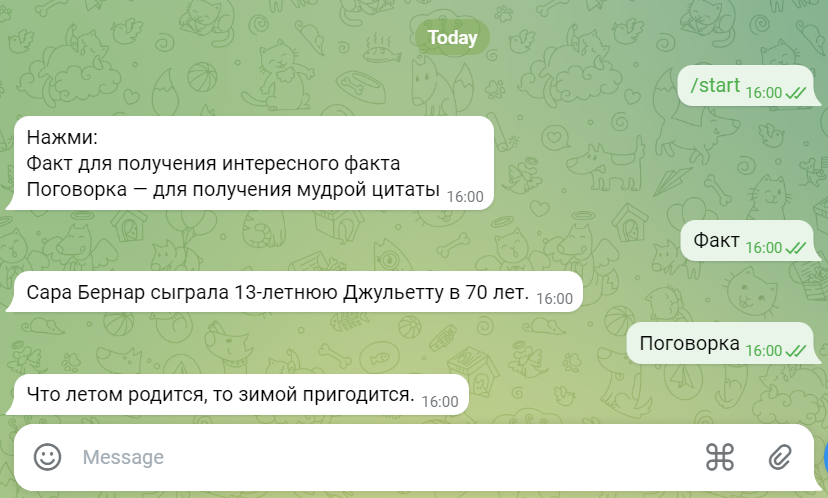